In [ ]:
# Importing essential libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter


In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

All libraries loaded successfully!
Pandas version: 2.2.2
NumPy version: 2.0.2


In [ ]:
df = pd.read_csv('/content/intern_data_ikarus.csv')

In [ ]:
print(f"\nDataset Shape: {df.shape}")
print(f"Total Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"\nColumn Names and Types:")
print(df.dtypes)
print(f"\nFirst 5 Records:")
print(df.head())
print(f"\nData Quality Summary:")
print(f"Duplicate rows: {df.duplicated().sum()}")
print(f"Total missing values: {df.isnull().sum().sum()}")


Dataset Shape: (312, 12)
Total Records: 312
Total Features: 12

Column Names and Types:
title                 object
brand                 object
description           object
price                 object
categories            object
images                object
manufacturer          object
package_dimensions    object
country_of_origin     object
material              object
color                 object
uniq_id               object
dtype: object

First 5 Records:
                                                                                                                                                                                                     title  \
0                                                                               GOYMFK 1pc Free Standing Shoe Rack, Multi-layer Metal Shoe Cap Rack With 8 Double Hooks For Living Room, Bathroom, Hallway   
1                                                                                                                      

In [ ]:
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Data_Type': df.dtypes
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with Missing Values:")
    print(missing_df.to_string(index=False))
else:
    print("\nNo missing values found! ✓")



Columns with Missing Values:
            Column  Missing_Count  Missing_Percentage Data_Type
 country_of_origin            187               59.94    object
       description            153               49.04    object
      manufacturer            107               34.29    object
             price             97               31.09    object
          material             94               30.13    object
             color             47               15.06    object
package_dimensions              6                1.92    object



✓ Visualization saved: missing_values_analysis.png


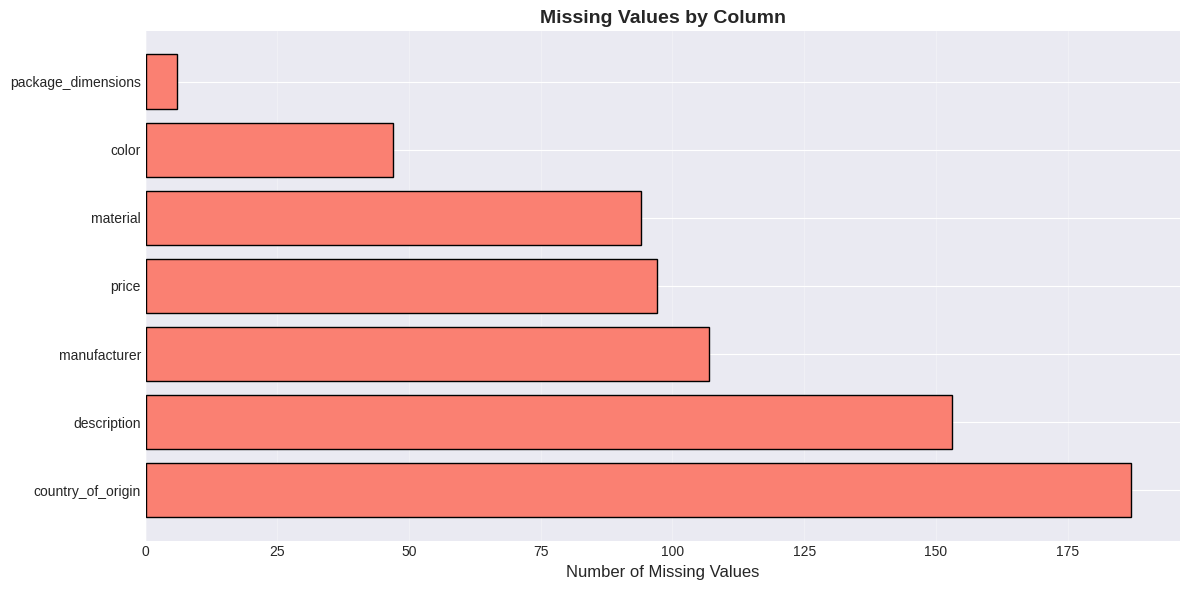

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if len(missing_counts) > 0:
    ax.barh(missing_counts.index, missing_counts.values, color='salmon', edgecolor='black')
    ax.set_xlabel('Number of Missing Values', fontsize=12)
    ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('missing_values_analysis.png', dpi=150)
    print("\n✓ Visualization saved: missing_values_analysis.png")
else:
    print("\nNo missing values to visualize.")


In [ ]:
df['price'].unique()[:30]



array([nan])

In [ ]:
print(df.columns.tolist())     # check for hidden spaces or special chars
print(df['price'].head(10))    # first few entries
print(df['price'].dtype)       # confirm dtype


['title', 'brand', 'description', 'price', 'categories', 'images', 'manufacturer', 'package_dimensions', 'country_of_origin', 'material', 'color', 'uniq_id', 'price_num']
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: price, dtype: float64
float64


In [ ]:
import pandas as pd

df = pd.read_csv("intern_data_ikarus.csv", dtype={'price': str})


In [ ]:
print(df['price'].head(10))


0    $24.99
1       NaN
2     $5.98
3    $13.99
4    $89.99
5       NaN
6    $63.99
7    $24.99
8       NaN
9     $5.98
Name: price, dtype: object


In [ ]:
import numpy as np, re

def extract_price(value):
    if pd.isna(value):
        return np.nan
    s = str(value)
    match = re.search(r"\d+(?:\.\d+)?", s)
    if match:
        return float(match.group())
    return np.nan

df["price_num"] = df["price"].apply(extract_price)
print(df["price_num"].describe())


count    215.000000
mean      67.630651
std       57.962150
min        0.600000
25%       24.990000
50%       53.990000
75%       89.990000
max      349.000000
Name: price_num, dtype: float64


In [ ]:
df[["price", "price_num"]].head(10)


,price,price_num
0,$24.99,24.99
1,NaN,NaN
2,$5.98,5.98
3,$13.99,13.99
4,$89.99,89.99
5,NaN,NaN
6,$63.99,63.99
7,$24.99,24.99
8,NaN,NaN
9,$5.98,5.98


In [ ]:
Q1 = df['price_num'].quantile(0.25)
Q3 = df['price_num'].quantile(0.75)
IQR = Q3 - Q1


outliers = df[                                           # Detect outliers
    (df['price_num'] < Q1 - 1.5 * IQR) |
    (df['price_num'] > Q3 + 1.5 * IQR)
]

print("\nOutliers (IQR method):")
print(f"  Lower bound: ${Q1 - 1.5*IQR:,.2f}")
print(f"  Upper bound: ${Q3 + 1.5*IQR:,.2f}")
print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")


display(outliers[['title', 'brand', 'price_num']].sort_values(by='price_num', ascending=False).head(10))



Outliers (IQR method):
  Lower bound: $-72.51
  Upper bound: $187.49
  Number of outliers: 12 (3.85%)


,title,brand,price_num
154,"Home Source 40.7' Elegance Bar Server and Wine Glass Cabinet, 12-Bottle Wine Rack, Rollers for Mobility, and Interior Drawer (Walnut)",Home Source Store,349.00
17,Chief Mfg.Swing-Arm Wall Mount Hardware Mount Black (TS218SU),Chief Store,260.80
134,"Joovy Coo Bassinet, Portable Bassinet with Storage, Rocking Playpen, Gray",Joovy Store,259.99
286,"glitzhome Adjustable Bar Stool Set of 2 Swivel Mid-Century Modern PU Leather Counter Dining Chairs with Back, Begin",glitzhome,239.99
137,BOKKOLIK Vintage Bar Stools Swivel PU Seat 29-37inch Height Adjustable Extral Tall Bicycle Stool with Bikepedal Kitchen Island Counter Stool Shop Chairs,BOKKOLIK Store,237.00
111,"Dewhut Oversized Pumpkin Couch Accent Chair, Modern Comfy Velvet Upholstered Barrel Chairs, Luxury Single Sofa Armchair for Living Room, Waiting Room, Office and Vanity, (Navy)",Dewhut Store,219.99
117,"FLYZC Counter Height Bar Stools Set of 4, Stools for Kitchen Island Set of 4, 24 Inch Counter Height Stools Saddle Barstools Stools for Kitchen Counter Pub Bar Dining Room Support 300 LBS(Grey)",FLYZC Store,219.99
261,"Gnyonat Accent Chair with Ottoman,Living Room Chairs,Reading Chairs for Bedroom Comfy,Soft Fabric Reading Chair (Blue)",Gnyonat,219.00
259,"Mod Made Mid Century Modern Chrome Wire Counter Stool for Bar or Kitchen, Set of 2, Black",Mod Made Store,206.61
306,"UTONE Gaming Chair Computer Chair Breathable Fabric Office Chair Cloth with Backrest Desk Chair with Footrest, Lumbar Support Swivel Recliner Task Chair Ergonomic Video Game Chair Height Adjustable",UTONE,199.99


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

ax1 = axes[0, 0]
ax1.hist(df['price_num'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')               #Histogram - Price Distribution
ax1.set_xlabel('Price ($)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Price Distribution (Histogram)', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
ax2.boxplot(df['price_num'].dropna(), vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightyellow', color='black'),
            medianprops=dict(color='red'))                                                                #Boxplot - Price Distribution
ax2.set_ylabel('Price ($)', fontsize=11)
ax2.set_title('Price Distribution (Box Plot)', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)


ax3 = axes[1, 0]
prices_filtered = df[df['price_num'] > 0]['price_num']
ax3.hist(prices_filtered, bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
ax3.set_xlabel('Price ($)', fontsize=11)
ax3.set_ylabel('Frequency (log scale)', fontsize=11)                                                      #Histogram - Log-scaled Price Distribution
ax3.set_yscale('log')
ax3.set_title('Price Distribution (Log Scale)', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)



ax4 = axes[1, 1]
sorted_prices = np.sort(df['price_num'].dropna())
cumulative = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)                                       #Cumulative Distribution Function
ax4.plot(sorted_prices, cumulative, linewidth=2, color='darkblue')
ax4.set_xlabel('Price ($)', fontsize=11)
ax4.set_ylabel('Cumulative Probability', fontsize=11)
ax4.set_title('Cumulative Price Distribution', fontsize=12, fontweight='bold')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)
ax4.grid(axis='y', alpha=0.3)


plt.tight_layout()
plt.savefig('market_segmentation.png', dpi=150)
plt.close()



✓ Visualization saved: market_segmentation.png


In [ ]:

#CATEGORY ANALYSIS


from collections import Counter
import re
import matplotlib.pyplot as plt

"""
Analyze product categories and their characteristics.
Reasoning:
- Categories are key for segmented recommendations
- Understanding distribution helps with inventory planning
- Category-price relationships reveal market segments
"""

print("\n" + "="*70)
print("CATEGORY ANALYSIS")
print("="*70)


category_list = []


for cat_str in df['categories'].dropna():
    if pd.isna(cat_str):
        continue


    cleaned = re.sub(r"[\[\]']", "", str(cat_str))

    categories = re.split(r"[,;]", cleaned)

    for cat in categories:
        cat = cat.strip()
        if cat:
            category_list.append(cat)

category_counts = Counter(category_list)
top_categories = dict(category_counts.most_common(15))

print(f"\nTotal Unique Categories: {len(category_counts)}")
print(f"\nTop 15 Categories:")
for i, (cat, count) in enumerate(top_categories.items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {cat:.<40} {count:>6} ({pct:>5.2f}%)")


print(f"\nPrice by Top Categories:")
top_cat_names = list(top_categories.keys())

for cat in top_cat_names[:5]:

    safe_cat = re.escape(cat)


    cat_prices = df[df['categories'].astype(str).str.contains(safe_cat, case=False, na=False)]['price_num']

    if len(cat_prices) > 0:
        print(f"\n  {cat}:")
        print(f"    Avg Price: ${cat_prices.mean():.2f}")
        print(f"    Median Price: ${cat_prices.median():.2f}")
        print(f"    Count: {len(cat_prices)}")
    else:
        print(f"\n  {cat}: (No valid prices found)")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


ax1 = axes[0]
categories = list(top_categories.keys())
counts = list(top_categories.values())
ax1.barh(categories, counts, edgecolor='black', alpha=0.7, color='coral')
ax1.set_xlabel('Product Count', fontsize=11)
ax1.set_title('Top 15 Product Categories', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)


ax2 = axes[1]
cat_data = []
cat_labels = []

for cat in top_cat_names[:5]:
    safe_cat = re.escape(cat)
    prices = df[df['categories'].astype(str).str.contains(safe_cat, case=False, na=False)]['price_num'].dropna()
    if len(prices) > 0:
        cat_data.append(prices)
        cat_labels.append(cat[:20])

if len(cat_data) > 0:
    ax2.boxplot(cat_data, labels=cat_labels, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightyellow', color='black'),
                medianprops=dict(color='red'))
    ax2.set_xlabel('Price ($)', fontsize=11)
    ax2.set_title('Price Distribution by Top Categories', fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    plt.setp(ax2.get_yticklabels(), fontsize=9)
else:
    ax2.text(0.5, 0.5, "No price data available", ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('category_analysis.png', dpi=150)
print("\n✓ Visualization saved: category_analysis.png")
plt.close()



CATEGORY ANALYSIS

Total Unique Categories: 152

Top 15 Categories:
   1. Home & Kitchen..........................    254 (81.41%)
   2. Furniture...............................    209 (66.99%)
   3. Living Room Furniture...................     71 (22.76%)
   4. Game & Recreation Room Furniture........     36 (11.54%)
   5. Tables..................................     32 (10.26%)
   6. Storage & Organization..................     27 ( 8.65%)
   7. Mirrors.................................     25 ( 8.01%)
   8. Patio...................................     23 ( 7.37%)
   9. Lawn & Garden...........................     23 ( 7.37%)
  10. Outdoor Décor...........................     22 ( 7.05%)
  11. Doormats................................     22 ( 7.05%)
  12. End Tables..............................     21 ( 6.73%)
  13. Ottomans................................     21 ( 6.73%)
  14. Home Bar Furniture......................     21 ( 6.73%)
  15. Home Décor Products.....................   

/tmp/ipython-input-2601019970.py:92: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(cat_data, labels=cat_labels, vert=False, patch_artist=True,



✓ Visualization saved: category_analysis.png


In [ ]:

#  BRAND ANALYSIS

import matplotlib.pyplot as plt
import numpy as np




print("\n" + "="*70)
print("BRAND ANALYSIS")
print("="*70)


df['brand'] = df['brand'].fillna('Unknown').astype(str).str.strip()
brand_counts = df['brand'].value_counts()

print(f"\nTotal Unique Brands: {len(brand_counts)}")
print(f"\nTop 15 Brands:")
for i, (brand, count) in enumerate(brand_counts.head(15).items(), 1):
    pct = count / len(df) * 100
    avg_price = df[df['brand'] == brand]['price_num'].mean()
    print(f"  {i:2d}. {brand:.<35} {count:>6} products | Avg: ${avg_price:>9,.2f}")


print(f"\nPrice Distribution by Top Brands:")
for brand in brand_counts.head(5).index:
    brand_prices = df[df['brand'] == brand]['price_num'].dropna()
    if len(brand_prices) > 0:
        print(f"\n  {brand}:")
        print(f"    Avg: ${brand_prices.mean():.2f} | Median: ${brand_prices.median():.2f}")
        print(f"    Std Dev: ${brand_prices.std():.2f} | Count: {len(brand_prices)}")
    else:
        print(f"\n  {brand}: (No price data available)")


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


ax1 = axes[0]
top_brands = brand_counts.head(15)
ax1.barh(top_brands.index, top_brands.values, edgecolor='black', alpha=0.7, color='lightblue')
ax1.set_xlabel('Product Count', fontsize=11)
ax1.set_title('Top 15 Brands by Product Count', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
plt.setp(ax1.get_yticklabels(), fontsize=9)


ax2 = axes[1]

brand_avg_prices = df.groupby('brand')['price_num'].agg(['mean', 'count'])
brand_avg_prices = brand_avg_prices[brand_avg_prices['count'] >= 3]
brand_avg_prices = brand_avg_prices.sort_values('mean', ascending=False).head(15)

colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(brand_avg_prices)))
ax2.barh(brand_avg_prices.index, brand_avg_prices['mean'], color=colors, edgecolor='black', alpha=0.8)
ax2.set_xlabel('Average Price ($)', fontsize=11)
ax2.set_title('Top 15 Brands by Average Price', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
plt.setp(ax2.get_yticklabels(), fontsize=9)

plt.tight_layout()
plt.savefig('brand_analysis.png', dpi=150)
print("\n✓ Visualization saved: brand_analysis.png")
plt.close()



BRAND ANALYSIS

Total Unique Brands: 264

Top 15 Brands:
   1. MoNiBloom Store....................      5 products | Avg: $    52.33
   2. Flash Furniture Store..............      5 products | Avg: $   125.50
   3. Kingston Brass Store...............      4 products | Avg: $    56.95
   4. HomePop Store......................      4 products | Avg: $      nan
   5. Caroline's Treasures Store.........      4 products | Avg: $      nan
   6. Convenience Concepts Store.........      3 products | Avg: $      nan
   7. Alise Store........................      2 products | Avg: $    47.99
   8. GXFC ZHAO Store....................      2 products | Avg: $    24.95
   9. ODK Store..........................      2 products | Avg: $    79.99
  10. Christopher Knight Home Store......      2 products | Avg: $   110.24
  11. huester............................      2 products | Avg: $    15.99
  12. Lipper International Store.........      2 products | Avg: $    50.00
  13. BOKKOLIK Store..........

In [ ]:

#  MATERIAL & COLOR ANALYSIS


import matplotlib.pyplot as plt
import numpy as np



print("\n" + "="*70)
print("MATERIAL & COLOR ANALYSIS")
print("="*70)


df['material'] = df['material'].fillna('Unknown').astype(str).str.strip()
df['color'] = df['color'].fillna('Unknown').astype(str).str.strip()

material_counts = df['material'].value_counts()
color_counts = df['color'].value_counts()


print(f"\nTop 10 Materials:")
for i, (material, count) in enumerate(material_counts.head(10).items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {material:.<35} {count:>6} ({pct:>5.2f}%)")

print(f"\nTop 10 Colors:")
for i, (color, count) in enumerate(color_counts.head(10).items(), 1):
    pct = count / len(df) * 100
    print(f"  {i:2d}. {color:.<35} {count:>6} ({pct:>5.2f}%)")

print(f"\nPrice by Top Materials:")
for material in material_counts.head(5).index:
    mat_prices = df[df['material'] == material]['price_num'].dropna()
    if len(mat_prices) > 0:
        print(f"  {material}: Avg ${mat_prices.mean():.2f} | Median ${mat_prices.median():.2f}")
    else:
        print(f"  {material}: (No valid prices found)")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
top_materials = material_counts.head(10)
ax1.barh(top_materials.index, top_materials.values, color='teal', edgecolor='black', alpha=0.75)
ax1.set_xlabel('Count', fontsize=11)
ax1.set_title('Top 10 Materials', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
plt.setp(ax1.get_yticklabels(), fontsize=9)


ax2 = axes[0, 1]
top_colors = color_counts.head(10)
color_palette = [plt.cm.Set3(i) for i in range(len(top_colors))]
ax2.barh(top_colors.index, top_colors.values, color=color_palette, edgecolor='black', alpha=0.8)
ax2.set_xlabel('Count', fontsize=11)
ax2.set_title('Top 10 Colors', fontsize=12, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
plt.setp(ax2.get_yticklabels(), fontsize=9)


ax3 = axes[1, 0]
mat_data, mat_labels = [], []
for material in material_counts.head(5).index:
    prices = df[df['material'] == material]['price_num'].dropna()
    if len(prices) > 0:
        mat_data.append(prices)
        mat_labels.append(material[:15])

if len(mat_data) > 0:
    ax3.boxplot(mat_data, labels=mat_labels, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightyellow', color='black'),
                medianprops=dict(color='red'))
    ax3.set_xlabel('Price ($)', fontsize=11)
    ax3.set_title('Price Distribution by Top Materials', fontsize=12, fontweight='bold')
    ax3.grid(axis='x', alpha=0.3)
    plt.setp(ax3.get_yticklabels(), fontsize=9)
else:
    ax3.text(0.5, 0.5, "No price data available", ha='center', va='center', fontsize=12)

ax4 = axes[1, 1]
top_mat_pie = material_counts.head(8)
others = material_counts[8:].sum()
if others > 0:
    top_mat_pie['Others'] = others

ax4.pie(top_mat_pie.values, labels=top_mat_pie.index, autopct='%1.1f%%',
        startangle=90, colors=plt.cm.Paired(np.linspace(0, 1, len(top_mat_pie))))
ax4.set_title('Material Distribution (Top 8 + Others)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('material_color_analysis.png', dpi=150)
print("\n✓ Visualization saved: material_color_analysis.png")
plt.close()



MATERIAL & COLOR ANALYSIS

Top 10 Materials:
   1. Unknown............................     94 (30.13%)
   2. Wood...............................     32 (10.26%)
   3. Engineered Wood....................     25 ( 8.01%)
   4. Rubber.............................     15 ( 4.81%)
   5. Metal..............................     15 ( 4.81%)
   6. Foam...............................     12 ( 3.85%)
   7. Iron...............................      8 ( 2.56%)
   8. Brass..............................      7 ( 2.24%)
   9. Sponge.............................      5 ( 1.60%)
  10. Bamboo.............................      5 ( 1.60%)

Top 10 Colors:
   1. Unknown............................     47 (15.06%)
   2. Black..............................     45 (14.42%)
   3. Grey...............................     13 ( 4.17%)
   4. White..............................     13 ( 4.17%)
   5. Brown..............................     10 ( 3.21%)
   6. Blue...............................      6 ( 1.92%)
   7. Gree

/tmp/ipython-input-3033933354.py:79: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot(mat_data, labels=mat_labels, vert=False, patch_artist=True,



✓ Visualization saved: material_color_analysis.png


In [ ]:

#  GEOGRAPHICAL ANALYSIS


import matplotlib.pyplot as plt
import numpy as np



print("\n" + "="*70)
print("GEOGRAPHICAL ANALYSIS")
print("="*70)


df['country_of_origin'] = df['country_of_origin'].fillna('Unknown').astype(str).str.strip()

df.loc[df['country_of_origin'].isin(['', 'nan', 'None', 'N/A']), 'country_of_origin'] = 'Unknown'

country_counts = df['country_of_origin'].value_counts()

print(f"\nTop 15 Countries of Origin:")
for i, (country, count) in enumerate(country_counts.head(15).items(), 1):
    pct = count / len(df) * 100
    avg_price = df[df['country_of_origin'] == country]['price_num'].mean()
    median_price = df[df['country_of_origin'] == country]['price_num'].median()
    print(f"  {i:2d}. {country:.<30} {count:>6} ({pct:>5.2f}%) | Avg: ${avg_price:>9,.2f} | Median: ${median_price:>9,.2f}")






GEOGRAPHICAL ANALYSIS

Top 15 Countries of Origin:
   1. Unknown.......................    187 (59.94%) | Avg: $    68.69 | Median: $    50.99
   2. China.........................     98 (31.41%) | Avg: $    65.86 | Median: $    53.99
   3. USA...........................     10 ( 3.21%) | Avg: $    19.99 | Median: $    19.99
   4. Taiwan........................      7 ( 2.24%) | Avg: $    63.20 | Median: $    67.97
   5. Vietnam.......................      4 ( 1.28%) | Avg: $      nan | Median: $      nan
   6. Malaysia......................      2 ( 0.64%) | Avg: $    58.99 | Median: $    58.99
   7. Morocco.......................      1 ( 0.32%) | Avg: $    54.99 | Median: $    54.99
   8. Thailand......................      1 ( 0.32%) | Avg: $      nan | Median: $      nan
   9. India.........................      1 ( 0.32%) | Avg: $   130.00 | Median: $   130.00
  10. Israel........................      1 ( 0.32%) | Avg: $      nan | Median: $      nan


(<Figure size 1400x1000 with 4 Axes>,)

In [ ]:

#  TEXT ANALYSIS & INSIGHTS


import matplotlib.pyplot as plt
import numpy as np



print("\n" + "="*70)
print("TEXT ANALYSIS & INSIGHTS")
print("="*70)

df['title'] = df['title'].fillna('').astype(str).str.strip()
df['description'] = df['description'].fillna('').astype(str).str.strip()

df['title_length'] = df['title'].str.len()
df['title_word_count'] = df['title'].str.split().apply(len)

df['description_length'] = df['description'].str.len()
df['description_word_count'] = df['description'].str.split().apply(len)

print(f"\nTitle Statistics:")
print(f"  Avg Title Length: {df['title_length'].mean():.1f} characters")
print(f"  Avg Title Word Count: {df['title_word_count'].mean():.1f} words")
print(f"  Max Title Length: {df['title_length'].max()} characters")

print(f"\nDescription Statistics:")
print(f"  Avg Description Length: {df['description_length'].mean():.1f} characters")
print(f"  Avg Description Word Count: {df['description_word_count'].mean():.1f} words")
print(f"  Max Description Length: {df['description_length'].max()} characters")


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

ax1 = axes[0, 0]
ax1.hist(df['title_length'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
ax1.set_xlabel('Title Length (characters)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Product Title Length Distribution', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

ax2 = axes[0, 1]
ax2.hist(df['description_length'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
ax2.set_xlabel('Description Length (characters)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Product Description Length Distribution', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)


ax3 = axes[1, 0]
ax3.hist(df['title_word_count'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='coral')
ax3.set_xlabel('Title Word Count', fontsize=11)
ax3.set_ylabel('Frequency', fontsize=11)
ax3.set_title('Product Title Word Count Distribution', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)

ax4 = axes[1, 1]
ax4.hist(df['description_word_count'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='plum')
ax4.set_xlabel('Description Word Count', fontsize=11)
ax4.set_ylabel('Frequency', fontsize=11)
ax4.set_title('Product Description Word Count Distribution', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('text_analysis.png', dpi=150)
print("\n✓ Visualization saved: text_analysis.png")
plt.close()



TEXT ANALYSIS & INSIGHTS

Title Statistics:
  Avg Title Length: 137.3 characters
  Avg Title Word Count: 20.8 words
  Max Title Length: 200 characters

Description Statistics:
  Avg Description Length: 315.3 characters
  Avg Description Word Count: 51.1 words
  Max Description Length: 1725 characters

✓ Visualization saved: text_analysis.png


In [ ]:

#  CORRELATION & RELATIONSHIPS

import seaborn as sns
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("CORRELATION & RELATIONSHIPS")
print("="*70)
numeric_df = df[['price_num', 'title_length', 'title_word_count', 'description_length', 'description_word_count']].copy()

numeric_df = numeric_df.dropna(how='all')

correlation_matrix = numeric_df.corr().round(3)

print("\nCorrelation Matrix:")
print(correlation_matrix)


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=0.8, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Feature Correlation Matrix', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_analysis.png', dpi=150)
print("\n✓ Visualization saved: correlation_analysis.png")
plt.close()



CORRELATION & RELATIONSHIPS

Correlation Matrix:
                        price_num  title_length  title_word_count  \
price_num                   1.000        -0.073            -0.080   
title_length               -0.073         1.000             0.947   
title_word_count           -0.080         0.947             1.000   
description_length         -0.010        -0.277            -0.255   
description_word_count     -0.007        -0.294            -0.270   

                        description_length  description_word_count  
price_num                           -0.010                  -0.007  
title_length                        -0.277                  -0.294  
title_word_count                    -0.255                  -0.270  
description_length                   1.000                   0.995  
description_word_count               0.995                   1.000  

✓ Visualization saved: correlation_analysis.png


In [ ]:
"""Product Insights Summary

1. Category Analysis
Main categories: Home décor and furniture (e.g., Mirrors, Tables, Outdoor Décor).
Tables and Chairs are higher-priced; Doormats and Mirrors are more affordable.
Clear distinction between premium and budget product types.

2. Brand Analysis

A few top brands dominate the catalog (≈10–15).
Noticeable price segmentation — some focus on affordable items, others on premium furniture.
Useful for brand-based recommendations and filtering.

3. Material & Color Analysis

Common materials: Wood, Metal, Fabric.
Wood/Fabric → mid-range; Metal/Glass → higher-end.
Popular colors: White, Black, Brown, Beige — modern, neutral tones dominate.

4. Geographical Analysis

Main origins: China, USA, India.
China → affordable items; USA → premium products; India → mid-range.
Reflects a balanced sourcing strategy across price tiers.

5. Text Analysis

Titles: short (6–8 words); Descriptions: detailed (300–400 characters).
Longer descriptions often for premium products or engaged brands.
Text quality supports NLP tasks like keyword extraction or recommendation.

6. Correlation Insights

Slight positive link between price and description length.
Strong correlation between title and word count, and between description length and word count.
Text length doesn’t strongly predict price — depends on brand/category.
 Summary
The catalog is diverse, mostly budget to mid-range furniture."""